# Base R
See also:
- https://www.statmethods.net/input/datatypes.html  
- https://www.r-bloggers.com/why-do-we-use-arrow-as-an-assignment-operator/

## Assignment

In [3]:
# Create a variable and assign a value to it
a = 2

# We can also use an arrow for assignment
a0 <- 1

a
a0
a == a0

[1] 2

[1] 1

[1] FALSE

In [2]:
# "a" is a numeric variable stored as a double
typeof(a)

[1] "double"

In [4]:
# We could force a to be stored as an integer
a_int = as.integer(a)

typeof(a_int)

[1] "integer"

## Common data types

### Character strings

In [5]:
# Character string
b = "Bonjour"

b
typeof(b)

[1] "Bonjour"

[1] "character"

In [6]:
# For character strings two types of quotation marks can be used interchangeably
d = 'Bonjour'

b == d

[1] TRUE

### Logicals

In [12]:
# Logical / boolean
c <- b == d

c
typeof(c)

[1] TRUE

[1] "logical"

### Vectors

In [13]:
# Vector
d = c(1,4,5) # vector

d
typeof(d)

[1] 1 4 5

[1] "double"

In [16]:
# For consecutive sequences, we can be lazy
d_seq = 2:10

d_seq

[1]  2  3  4  5  6  7  8  9 10

In [17]:
# If we mix data types in a single vector, it will be all converted to a unique data type
e = c(pi, a, "Merci")

e
typeof(e)

[1] "3.14159265358979" "2"                "Merci"

[1] "character"

In [18]:
# We can refer to one element of a vector
e[1]

# And even to several ("slicing")
e[1:2]
e[c(1,3)]



[1] "3.14159265358979"

[1] "3.14159265358979" "2"

[1] "3.14159265358979" "Merci"

In [20]:
e[1,2]

ERROR: Error in e[1, 2]: incorrect number of dimensions


### Lists

In [21]:
# List
f = list(name = "Laura", mynumbers = d, age = 42)

f
typeof(f)

$name
[1] "Laura"

$mynumbers
[1] 1 4 5

$age
[1] 42

[1] "list"

In [26]:
# We can refer to one element of a list in different ways that do not produce the same output
f[1]
typeof(f[1])

$name
[1] "Laura"

[1] "list"

In [25]:
f$age
typeof(f$age)

[1] 42

[1] "double"

In [24]:
f["age"]
typeof(f["age"])

$age
[1] 42

[1] "list"

In [27]:
f[["name"]]
typeof(f[["name"]])

[1] "Laura"

[1] "character"

In [28]:
# We can also slice lists
f[1:2]
f[c(1,3)]
f[c("name","age")]

$name
[1] "Laura"

$mynumbers
[1] 1 4 5

$name
[1] "Laura"

$age
[1] 42

$name
[1] "Laura"

$age
[1] 42

### Data frames

In [31]:
# We can build dataframes, that look like tables

g <- c("Lou","Damien","Sarah")
h <- c(31, 29, 3)
i <- c("mother","father","child")

df <- data.frame(Name = g, Age = h, Role = i)

df

Name   Age Role  
1 Lou    31  mother
2 Damien 29  father
3 Sarah   3  child

In [32]:
names(df)

[1] "Name" "Age"  "Role"

In [33]:
# It's not a good idea to have capital letters in variable names, let's correct that
names(df) <- c("name","age","role")

names(df)

[1] "name" "age"  "role"

In [34]:
# A quicker way to do that when e have many variables
names(df) <- tolower(names(df))

names(df)

[1] "name" "age"  "role"

In [35]:
# Just like for lists, there are a variety of ways to select variables of a data frame

df[c(1,3)] # columns 3,4,5 of data frame
df[c("age","role")] # columns "age" and "role" from data frame
df$name # variable name in the data frame

name   role  
1 Lou    mother
2 Damien father
3 Sarah  child

age role  
1 31  mother
2 29  father
3  3  child

[1] Lou    Damien Sarah 
Levels: Damien Lou Sarah

In [37]:
# We can also select specific rows
df[2,]

name   age role  
2 Damien 29  father

In [38]:
# We can combine row and column selection simultaneously
df[2,c("age","role")]

age role  
2 29  father

# Functions

## Calling a function

In [39]:
dicenum = seq(from = 1,to = 6, by = 1)
dicenum

[1] 1 2 3 4 5 6

In [42]:
y = sample(x = dicenum, size = 100, replace = TRUE)
y

[1] 2 5 1 3 2 6 6 3 5 5 4 1 3 4 4 5 2 6 2 6 2 3 5 2 5 1 4 4 6 2 3 6 2 2 3 3 5
 [38] 2 2 3 2 5 1 3 1 6 5 6 4 6 1 6 5 4 3 5 1 6 3 2 3 3 3 5 6 1 1 6 4 4 5 5 6 2
 [75] 5 3 5 2 5 4 1 5 3 4 6 3 2 3 4 5 2 1 1 4 2 3 2 3 6 1

In [43]:
mean(y)

[1] 3.54

In [48]:
dicenum = seq(1,6,1)
dicenum

[1] 1 2 3 4 5 6

In [47]:
y = sample(dicenum, 100, replace= T)

mean(y)

[1] 1

## Creating a function

# Importing data

In [50]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   0.8.5
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [51]:
# Let's use the function that seems made for reading csv files
df <- read_csv("1-01_dummy-data.csv")

df

Parsed with column specification:
cols(
  `subject	block_num	condition	stim_time	stim_side	response	response_time` = col_character()
)


subject\tblock_num\tcondition\tstim_time\tstim_side\tresponse\tresponse_time
1  Anna\t1\teasy\t1.531\tL\tL\t2.015                                           
2  Anna\t1\teasy\t4.760\tL\tL\t4.915                                           
3  Anna\t1\teasy\t6.855\tR\tR\t7.895                                           
4  Anna\t2\thard\t1.168\tR\tR\t2.437                                           
5  Anna\t2\thard\t5.016\tR\tR\t6.784                                           
6  Anna\t2\thard\t9.122\tL\tR\t9.981                                           
7  Boris\t1\thard\t1.496\tR\tR\t2.255                                          
8  Boris\t1\thard\t4.320\tL\tR\t5.015                                          
9  Boris\t1\thard\t6.228\tR\tR\t6.985                                          
10 Boris\t2\teasy\t1.050\tR\tL\t2.220                                          
11 Boris\t2\teasy\t4.834\tR\tR\t6.784                                          
12 Boris\t2\teasy\t8.831\tL\tL\t10.120

In [54]:
df[[1,1]]

[1] "Anna\t1\teasy\t1.531\tL\tL\t2.015"

In [55]:
df <- read_delim("1-01_dummy-data.csv")

df

Parsed with column specification:
cols(
  subject = col_character(),
  block_num = col_double(),
  condition = col_character(),
  stim_time = col_double(),
  stim_side = col_character(),
  response = col_character(),
  response_time = col_double()
)


subject block_num condition stim_time stim_side response response_time
1  Anna    1         easy      1.531     L         L         2.015       
2  Anna    1         easy      4.760     L         L         4.915       
3  Anna    1         easy      6.855     R         R         7.895       
4  Anna    2         hard      1.168     R         R         2.437       
5  Anna    2         hard      5.016     R         R         6.784       
6  Anna    2         hard      9.122     L         R         9.981       
7  Boris   1         hard      1.496     R         R         2.255       
8  Boris   1         hard      4.320     L         R         5.015       
9  Boris   1         hard      6.228     R         R         6.985       
10 Boris   2         easy      1.050     R         L         2.220       
11 Boris   2         easy      4.834     R         R         6.784       
12 Boris   2         easy      8.831     L         L        10.120

In [56]:
print(df)

# A tibble: 12 x 7
   subject block_num condition stim_time stim_side response response_time
   <chr>       <dbl> <chr>         <dbl> <chr>     <chr>            <dbl>
 1 Anna            1 easy           1.53 L         L                 2.02
 2 Anna            1 easy           4.76 L         L                 4.92
 3 Anna            1 easy           6.86 R         R                 7.90
 4 Anna            2 hard           1.17 R         R                 2.44
 5 Anna            2 hard           5.02 R         R                 6.78
 6 Anna            2 hard           9.12 L         R                 9.98
 7 Boris           1 hard           1.50 R         R                 2.26
 8 Boris           1 hard           4.32 L         R                 5.01
 9 Boris           1 hard           6.23 R         R                 6.98
10 Boris           2 easy           1.05 R         L                 2.22
11 Boris           2 easy           4.83 R         R                 6.78
12 Boris           

## Pipe

In [ ]:
df %>% print()

# Tidying data

## separate() and unite()

In [57]:
df <- read_tsv("1-01_dummy-data_messy1.csv")

df

Parsed with column specification:
cols(
  subject = col_character(),
  block = col_character(),
  stim_time = col_double(),
  stim_side = col_character(),
  response = col_character(),
  response_time = col_double()
)


subject block  stim_time stim_side response response_time
1  Anna    easy_1 1.531     L         L         2.015       
2  Anna    easy_1 4.760     L         L         4.915       
3  Anna    easy_1 6.855     R         R         7.895       
4  Anna    hard_2 1.168     R         R         2.437       
5  Anna    hard_2 5.016     R         R         6.784       
6  Anna    hard_2 9.122     L         R         9.981       
7  Boris   hard_1 1.496     R         R         2.255       
8  Boris   hard_1 4.320     L         R         5.015       
9  Boris   hard_1 6.228     R         R         6.985       
10 Boris   easy_2 1.050     R         L         2.220       
11 Boris   easy_2 4.834     R         R         6.784       
12 Boris   easy_2 8.831     L         L        10.120

In [58]:
df %>% separate(col = block, into = c("condition","block_num"), sep = "_")

subject condition block_num stim_time stim_side response response_time
1  Anna    easy      1         1.531     L         L         2.015       
2  Anna    easy      1         4.760     L         L         4.915       
3  Anna    easy      1         6.855     R         R         7.895       
4  Anna    hard      2         1.168     R         R         2.437       
5  Anna    hard      2         5.016     R         R         6.784       
6  Anna    hard      2         9.122     L         R         9.981       
7  Boris   hard      1         1.496     R         R         2.255       
8  Boris   hard      1         4.320     L         R         5.015       
9  Boris   hard      1         6.228     R         R         6.985       
10 Boris   easy      2         1.050     R         L         2.220       
11 Boris   easy      2         4.834     R         R         6.784       
12 Boris   easy      2         8.831     L         L        10.120

How I got it messy in the first place:

In [ ]:
df %>% unite(col = block, condition, block_num, sep = "_")
# write_tsv(df, "1-01_dummy-data_messy-1.csv")

## gather() and spread()

In [59]:
df <- read_tsv("1-01_dummy-data_messy2.csv")

df

Parsed with column specification:
cols(
  subject = col_character(),
  condition = col_character(),
  L = col_double(),
  R = col_double()
)


subject condition L      R     
1 Anna    easy       3.465 7.8950
2 Anna    hard       9.981 4.6105
3 Boris   easy      10.120 4.5020
4 Boris   hard       5.015 4.6200

In [60]:
df  %>% gather(key = stim_side, value = response_time, L, R)

subject condition stim_side response_time
1 Anna    easy      L          3.4650      
2 Anna    hard      L          9.9810      
3 Boris   easy      L         10.1200      
4 Boris   hard      L          5.0150      
5 Anna    easy      R          7.8950      
6 Anna    hard      R          4.6105      
7 Boris   easy      R          4.5020      
8 Boris   hard      R          4.6200

How I made it messy in the first place:

In [ ]:

# df <- df %>% separate(col = block, into = c("condition","block_num"), sep = "_")
df %>%
    select(subject,condition,stim_side,response_time) %>%
#     unite(col = tmp, condition, stim_side, sep="_") %>%
    group_by(subject, condition, stim_side) %>% summarise(response_time = mean(response_time)) %>% 
    spread(key = stim_side, value = response_time) %>%
    write_tsv("1-01_dummy-data_messy2.csv")

In [ ]:
df %>% select(subject,condition)

# Cleaning data

In [62]:
df <- read_tsv("1-01_dummy-data.csv")
df

Parsed with column specification:
cols(
  subject = col_character(),
  block_num = col_double(),
  condition = col_character(),
  stim_time = col_double(),
  stim_side = col_character(),
  response = col_character(),
  response_time = col_double()
)


subject block_num condition stim_time stim_side response response_time
1  Anna    1         easy      1.531     L         L         2.015       
2  Anna    1         easy      4.760     L         L         4.915       
3  Anna    1         easy      6.855     R         R         7.895       
4  Anna    2         hard      1.168     R         R         2.437       
5  Anna    2         hard      5.016     R         R         6.784       
6  Anna    2         hard      9.122     L         R         9.981       
7  Boris   1         hard      1.496     R         R         2.255       
8  Boris   1         hard      4.320     L         R         5.015       
9  Boris   1         hard      6.228     R         R         6.985       
10 Boris   2         easy      1.050     R         L         2.220       
11 Boris   2         easy      4.834     R         R         6.784       
12 Boris   2         easy      8.831     L         L        10.120

## Manipulating columns

### select()

In [63]:
df %>% select(subject,condition,response_time)

subject condition response_time
1  Anna    easy       2.015       
2  Anna    easy       4.915       
3  Anna    easy       7.895       
4  Anna    hard       2.437       
5  Anna    hard       6.784       
6  Anna    hard       9.981       
7  Boris   hard       2.255       
8  Boris   hard       5.015       
9  Boris   hard       6.985       
10 Boris   easy       2.220       
11 Boris   easy       6.784       
12 Boris   easy      10.120

In [65]:
df %>% select(subject,condition,ends_with("time"))

subject condition stim_time response_time
1  Anna    easy      1.531      2.015       
2  Anna    easy      4.760      4.915       
3  Anna    easy      6.855      7.895       
4  Anna    hard      1.168      2.437       
5  Anna    hard      5.016      6.784       
6  Anna    hard      9.122      9.981       
7  Boris   hard      1.496      2.255       
8  Boris   hard      4.320      5.015       
9  Boris   hard      6.228      6.985       
10 Boris   easy      1.050      2.220       
11 Boris   easy      4.834      6.784       
12 Boris   easy      8.831     10.120

In [66]:
df %>% select_if(is.character)

subject condition stim_side response
1  Anna    easy      L         L       
2  Anna    easy      L         L       
3  Anna    easy      R         R       
4  Anna    hard      R         R       
5  Anna    hard      R         R       
6  Anna    hard      L         R       
7  Boris   hard      R         R       
8  Boris   hard      L         R       
9  Boris   hard      R         R       
10 Boris   easy      R         L       
11 Boris   easy      R         R       
12 Boris   easy      L         L

### rename()

In [67]:
df %>% rename(id = subject, difficulty = condition)

id    block_num difficulty stim_time stim_side response response_time
1  Anna  1         easy       1.531     L         L         2.015       
2  Anna  1         easy       4.760     L         L         4.915       
3  Anna  1         easy       6.855     R         R         7.895       
4  Anna  2         hard       1.168     R         R         2.437       
5  Anna  2         hard       5.016     R         R         6.784       
6  Anna  2         hard       9.122     L         R         9.981       
7  Boris 1         hard       1.496     R         R         2.255       
8  Boris 1         hard       4.320     L         R         5.015       
9  Boris 1         hard       6.228     R         R         6.985       
10 Boris 2         easy       1.050     R         L         2.220       
11 Boris 2         easy       4.834     R         R         6.784       
12 Boris 2         easy       8.831     L         L        10.120

## Manipulating rows

### filter()

In [68]:
df %>% filter(condition == "easy")

subject block_num condition stim_time stim_side response response_time
1 Anna    1         easy      1.531     L         L         2.015       
2 Anna    1         easy      4.760     L         L         4.915       
3 Anna    1         easy      6.855     R         R         7.895       
4 Boris   2         easy      1.050     R         L         2.220       
5 Boris   2         easy      4.834     R         R         6.784       
6 Boris   2         easy      8.831     L         L        10.120

In [69]:
df %>% filter(stim_time > 3)

subject block_num condition stim_time stim_side response response_time
1 Anna    1         easy      4.760     L         L         4.915       
2 Anna    1         easy      6.855     R         R         7.895       
3 Anna    2         hard      5.016     R         R         6.784       
4 Anna    2         hard      9.122     L         R         9.981       
5 Boris   1         hard      4.320     L         R         5.015       
6 Boris   1         hard      6.228     R         R         6.985       
7 Boris   2         easy      4.834     R         R         6.784       
8 Boris   2         easy      8.831     L         L        10.120

### arrange()

In [70]:
df %>% arrange(block_num, response_time)

subject block_num condition stim_time stim_side response response_time
1  Anna    1         easy      1.531     L         L         2.015       
2  Boris   1         hard      1.496     R         R         2.255       
3  Anna    1         easy      4.760     L         L         4.915       
4  Boris   1         hard      4.320     L         R         5.015       
5  Boris   1         hard      6.228     R         R         6.985       
6  Anna    1         easy      6.855     R         R         7.895       
7  Boris   2         easy      1.050     R         L         2.220       
8  Anna    2         hard      1.168     R         R         2.437       
9  Anna    2         hard      5.016     R         R         6.784       
10 Boris   2         easy      4.834     R         R         6.784       
11 Anna    2         hard      9.122     L         R         9.981       
12 Boris   2         easy      8.831     L         L        10.120

## Managing missing values (NAs)

In [71]:
df.na <- read_csv("1-01_dummy-data_NA.csv")

df.na %>% print()

Parsed with column specification:
cols(
  subject = col_character(),
  block_num = col_double(),
  condition = col_character(),
  stim_time = col_double(),
  stim_side = col_character(),
  response = col_character(),
  response_time = col_double()
)


# A tibble: 12 x 7
   subject block_num condition stim_time stim_side response response_time
   <chr>       <dbl> <chr>         <dbl> <chr>     <chr>            <dbl>
 1 Anna            1 easy           1.53 L         L                NA   
 2 Anna            1 easy           4.76 L         L                 4.92
 3 Anna            1 <NA>           6.86 R         R                 7.90
 4 Anna            2 hard           1.17 R         R                 2.44
 5 Anna            2 hard          NA    R         R                 6.78
 6 Anna            2 hard           9.12 L         R                 9.98
 7 Boris           1 hard           1.50 R         R                 2.26
 8 Boris           1 <NA>           4.32 L         R                 5.01
 9 Boris           1 hard           6.23 R         <NA>              6.98
10 Boris           2 easy           1.05 R         L                 2.22
11 Boris           2 easy           4.83 R         R                 6.78
12 Boris           

### drop_na()

In [72]:
df.na  %>% filter(!is.na(response) & is.na(response_time))

subject block_num condition stim_time stim_side response response_time
1  Anna    1         easy      4.760     L         L         4.915       
2  Anna    1         NA        6.855     R         R         7.895       
3  Anna    2         hard      1.168     R         R         2.437       
4  Anna    2         hard         NA     R         R         6.784       
5  Anna    2         hard      9.122     L         R         9.981       
6  Boris   1         hard      1.496     R         R         2.255       
7  Boris   1         NA        4.320     L         R         5.015       
8  Boris   2         easy      1.050     R         L         2.220       
9  Boris   2         easy      4.834     R         R         6.784       
10 Boris   2         easy      8.831     L         L        10.120

In [ ]:
df.na  %>% drop_na(any_of(c("stim_time","response_time")))

### replace_na()

In [73]:
df.na

subject block_num condition stim_time stim_side response response_time
1  Anna    1         easy      1.531     L         L            NA       
2  Anna    1         easy      4.760     L         L         4.915       
3  Anna    1         NA        6.855     R         R         7.895       
4  Anna    2         hard      1.168     R         R         2.437       
5  Anna    2         hard         NA     R         R         6.784       
6  Anna    2         hard      9.122     L         R         9.981       
7  Boris   1         hard      1.496     R         R         2.255       
8  Boris   1         NA        4.320     L         R         5.015       
9  Boris   1         hard      6.228     R         NA        6.985       
10 Boris   2         easy      1.050     R         L         2.220       
11 Boris   2         easy      4.834     R         R         6.784       
12 Boris   2         easy      8.831     L         L        10.120

In [74]:
df.na %>% 
    replace_na(list(condition = "easy", response = "R"))

subject block_num condition stim_time stim_side response response_time
1  Anna    1         easy      1.531     L         L            NA       
2  Anna    1         easy      4.760     L         L         4.915       
3  Anna    1         easy      6.855     R         R         7.895       
4  Anna    2         hard      1.168     R         R         2.437       
5  Anna    2         hard         NA     R         R         6.784       
6  Anna    2         hard      9.122     L         R         9.981       
7  Boris   1         hard      1.496     R         R         2.255       
8  Boris   1         easy      4.320     L         R         5.015       
9  Boris   1         hard      6.228     R         R         6.985       
10 Boris   2         easy      1.050     R         L         2.220       
11 Boris   2         easy      4.834     R         R         6.784       
12 Boris   2         easy      8.831     L         L        10.120

# Transforming data

## mutate() and map()

In [ ]:
df %>% print()

In [ ]:
df %>% mutate(condition = as.factor(condition)) %>% print()

In [ ]:
df %>% mutate_if(is.character, as.factor) %>% print()

In [75]:
df %>% mutate(reaction_time = response_time - stim_time) %>% select(-block_num) %>% print(width = Inf)

# A tibble: 12 x 7
   subject condition stim_time stim_side response response_time reaction_time
   <chr>   <chr>         <dbl> <chr>     <chr>            <dbl>         <dbl>
 1 Anna    easy           1.53 L         L                 2.02         0.484
 2 Anna    easy           4.76 L         L                 4.92         0.155
 3 Anna    easy           6.86 R         R                 7.90         1.04 
 4 Anna    hard           1.17 R         R                 2.44         1.27 
 5 Anna    hard           5.02 R         R                 6.78         1.77 
 6 Anna    hard           9.12 L         R                 9.98         0.859
 7 Boris   hard           1.50 R         R                 2.26         0.759
 8 Boris   hard           4.32 L         R                 5.01         0.695
 9 Boris   hard           6.23 R         R                 6.98         0.757
10 Boris   easy           1.05 R         L                 2.22         1.17 
11 Boris   easy           4.83 R         R   

In [ ]:
df %>% mutate(stim_time = map2_dbl(stim_side, stim_time,
                                   .f=function(ss,st){if (ss=="L") {st} else {st-1}})) 

## group_by() and summarise()

In [76]:
df.rt <- df %>% mutate(reaction_time = response_time - stim_time) %>% select(-block_num)

df.rt %>% summarise(mean_rt = mean(reaction_time))

mean_rt
1 1.01625

In [80]:
df.rt <- df.rt %>% rename(rt = reaction_time)

# We can summarise multiple variables at once
df.rt %>% summarise(mean_rt = mean(rt),
                    sd_rt = sd(rt))

mean_rt sd_rt    
1 1.01625 0.5122015

In [ ]:
# Summarised variable exist immediately
df.rt %>% summarise(mean_rt = mean(rt),
                    sd_rt = sd(rt),
                    z = mean_rt/sd_rt)

In [78]:
df.rt %>%
    group_by(subject,condition) %>% ungroup()

subject condition stim_time stim_side response response_time reaction_time
1  Anna    easy      1.531     L         L         2.015        0.484        
2  Anna    easy      4.760     L         L         4.915        0.155        
3  Anna    easy      6.855     R         R         7.895        1.040        
4  Anna    hard      1.168     R         R         2.437        1.269        
5  Anna    hard      5.016     R         R         6.784        1.768        
6  Anna    hard      9.122     L         R         9.981        0.859        
7  Boris   hard      1.496     R         R         2.255        0.759        
8  Boris   hard      4.320     L         R         5.015        0.695        
9  Boris   hard      6.228     R         R         6.985        0.757        
10 Boris   easy      1.050     R         L         2.220        1.170        
11 Boris   easy      4.834     R         R         6.784        1.950        
12 Boris   easy      8.831     L         L        10.120        1.289

In [81]:
# We can summarise within subsets defined by levels of factors
df.rt %>%
    group_by(subject,condition) %>% 
    summarise(mean_rt = mean(rt),
              sd_rt = sd(rt))

subject condition mean_rt   sd_rt     
1 Anna    easy      0.5596667 0.44732576
2 Anna    hard      1.2986667 0.45522559
3 Boris   easy      1.4696667 0.42021463
4 Boris   hard      0.7370000 0.03638681

In [ ]:
# We can do complicated stuff with group_by, e.g. outlier detection by levels of factors 
df.rt %>%
    group_by(subject,condition) %>% 
    filter(rt < mean(rt) + sd(rt)) %>%
    summarise(mean_rt = mean(rt),
              sd_rt = sd(rt))

In [ ]:
df.rt %>%
    group_by(subject,condition) %>% 
    mutate(kept = rt < mean(rt) + sd(rt))

## recode_factor()

In [ ]:
# We can change how levels of a factor are coded
df %>%
    mutate_if(is.character,as.factor) %>%
    mutate(condition = recode_factor(condition, "easy"="E","hard"="H")) %>% print()

# Combining data frames

## bind_rows()

In [82]:
df.Anna <- read_tsv("1-01_dummy-data_Anna.csv") %>% print()
df.Boris <- read_tsv("1-01_dummy-data_Boris.csv") %>% print()

Parsed with column specification:
cols(
  subject = col_character(),
  block_num = col_double(),
  condition = col_character(),
  stim_time = col_double(),
  stim_side = col_character(),
  response = col_character(),
  response_time = col_double()
)


# A tibble: 6 x 7
  subject block_num condition stim_time stim_side response response_time
  <chr>       <dbl> <chr>         <dbl> <chr>     <chr>            <dbl>
1 Anna            1 easy           1.53 L         L                 2.02
2 Anna            1 easy           4.76 L         L                 4.92
3 Anna            1 easy           6.86 R         R                 7.90
4 Anna            2 hard           1.17 R         R                 2.44
5 Anna            2 hard           5.02 R         R                 6.78
6 Anna            2 hard           9.12 L         R                 9.98


Parsed with column specification:
cols(
  subject = col_character(),
  block_num = col_double(),
  condition = col_character(),
  stim_time = col_double(),
  stim_side = col_character(),
  response = col_character(),
  response_time = col_double()
)


# A tibble: 6 x 7
  subject block_num condition stim_time stim_side response response_time
  <chr>       <dbl> <chr>         <dbl> <chr>     <chr>            <dbl>
1 Boris           1 hard           1.50 R         R                 2.26
2 Boris           1 hard           4.32 L         R                 5.01
3 Boris           1 hard           6.23 R         R                 6.98
4 Boris           2 easy           1.05 R         L                 2.22
5 Boris           2 easy           4.83 R         R                 6.78
6 Boris           2 easy           8.83 L         L                10.1 


In [ ]:
bind_rows(df.Anna, df.Boris)

## *_join()

In [ ]:
df.tmp <- df %>%
    rownames_to_column(var = "trial_num") %>% # print()
    group_by(subject) %>% 
    mutate(trial_num = rank(trial_num))

df.tmp %>% select(subject,trial_num,block_num,condition) %>% write_tsv("1-01_dummy-data_factors.csv")

df.tmp %>% select(subject,trial_num,stim_time,response_time) %>% write_tsv("1-01_dummy-data_times.csv")


In [83]:
df.factors <- read_tsv("1-01_dummy-data_factors.csv") %>% arrange(subject,trial_num)
df.factors

df.times <- read_tsv("1-01_dummy-data_times.csv") %>% arrange(subject,trial_num)
df.times

Parsed with column specification:
cols(
  subject = col_character(),
  trial_num = col_double(),
  condition = col_character(),
  block_num = col_double()
)


subject trial_num condition block_num
1  Anna    1         easy      1        
2  Anna    2         easy      1        
3  Anna    3         easy      1        
4  Anna    4         hard      2        
5  Anna    5         hard      2        
6  Anna    6         hard      2        
7  Boris   1         easy      2        
8  Boris   2         easy      2        
9  Boris   3         easy      2        
10 Boris   4         hard      1        
11 Boris   5         hard      1        
12 Boris   6         hard      1

Parsed with column specification:
cols(
  subject = col_character(),
  trial_num = col_double(),
  stim_time = col_double(),
  response_time = col_double()
)


subject trial_num stim_time response_time
1  Anna    1         1.531      2.015       
2  Anna    2         4.760      4.915       
3  Anna    3         6.855      7.895       
4  Anna    4         1.168      2.437       
5  Anna    5         5.016      6.784       
6  Anna    6         9.122      9.981       
7  Boris   1         1.050      2.220       
8  Boris   2         4.834      6.784       
9  Boris   3         8.831     10.120       
10 Boris   4         1.496      2.255       
11 Boris   5         4.320      5.015       
12 Boris   6         6.228      6.985

In [84]:
full_join(df.factors, df.times)

Joining, by = c("subject", "trial_num")


subject trial_num condition block_num stim_time response_time
1  Anna    1         easy      1         1.531      2.015       
2  Anna    2         easy      1         4.760      4.915       
3  Anna    3         easy      1         6.855      7.895       
4  Anna    4         hard      2         1.168      2.437       
5  Anna    5         hard      2         5.016      6.784       
6  Anna    6         hard      2         9.122      9.981       
7  Boris   1         easy      2         1.050      2.220       
8  Boris   2         easy      2         4.834      6.784       
9  Boris   3         easy      2         8.831     10.120       
10 Boris   4         hard      1         1.496      2.255       
11 Boris   5         hard      1         4.320      5.015       
12 Boris   6         hard      1         6.228      6.985

# Data visualization

In [85]:
df <- read_tsv("1-01_data_participants.csv")

df

Parsed with column specification:
cols(
  year = col_character(),
  inference = col_double(),
  linmodel = col_double(),
  pvalue = col_double(),
  confint = col_double(),
  statpow = col_double(),
  probdist = col_double(),
  bayeslaw = col_double(),
  effectsize = col_double(),
  BF = col_double()
)


year        inference linmodel pvalue confint statpow probdist bayeslaw
1  D2           2         1        3      1       2       2        0      
2  D3 and more  2         2        2      2       2       2        2      
3  D2           3         3        3      1       2       1        0      
4  D2           1         0        2      2       1       0        0      
5  D2           3         2        3      3       2       2        1      
6  D3 and more  3         2        3      3       2       2        0      
7  D2           2         2        2      2       2       2        2      
8  D3 and more  2         1        3      2       2       2        2      
9  D2           0         1        2      1       0       0        0      
10 D3 and more  2         2        3      2       1       1        1      
11 D2           2         2        2      2       2       2        1      
12 D3 and more  2         3        3      2       1       3        1      
13 D1           1         1        3      2       1       2        0      
14 D3 and more  2         2        2      1       1       1        1      
15 D3 and more  1         1        2      2       2       1        1      
16 D2           2         1        2      2       2       0        1      
17 D2           2         2        2      2       1       2        0      
18 D2           1         1        2      2       2       1        1      
19 D1           2         1        3      2       1       1        2      
20 D1           3         3        3      2       2       2        2      
21 D1           2         2        2      2       2       2        1      
22 D1           2         1        3      2       2       1        0      
23 D2           1         1        2      1       2       1        0      
24 D3 and more  2         3        3      3       1       2        0      
25 D2           0         1        2      3       2       2        0      
26 D2           0         1        3      1       1       2        0      
27 D3 and more  3         2        3      2       2       0        0      
28 D1           2         2        3      2       2       3        2      
29 D2           3         3        3      3       3       3        0      
30 D1           1         1        2      2       1       1        1      
31 D1           1         1        2      1       2       0        0      
32 D1           2         2        2      2       2       2        0      
33 D1           2         2        2      2       2       2        0      
34 D1           2         2        1      1       1       2        1      
35 D1           3         1        3      3       2       2        2      
36 D2           1         0        2      2       2       2        0      
37 D3 and more  3         2        1      2       1       3        0      
38 D2           1         0        1      2       2       0        0      
39 D2           3         3        3      3       2       2        1      
40 D1           1         2        1      1       1       2        2      
41 D1           1         1        1      1       1       2        2      
42 D1           2         3        3      2       3       2        1      
43 D3 and more  0         0        0      0       0       0        0      
44 D1           3         2        3      3       2       2        3      
45 D2          NA        NA       NA     NA      NA      NA       NA      
46 D3 and more NA        NA       NA     NA      NA      NA       NA      
47 NA          NA        NA       NA     NA      NA      NA       NA      
   effectsize BF
1   2          0
2   2          2
3   2          0
4   1          0
5   2          1
6   2          0
7   3          2
8   3          1
9   0          0
10  2          0
11  1          1
12  1          1
13  1          0
14  1          1
15  2          1
16  2          0
17  1          0
18  1          0
19  3          2
20  2          1
21  2          1
22  2          0
23  0       

In [92]:
df %>% summarise_if(is.numeric, mean, na.rm=TRUE)  %>% 
    gather(key = var, value = avg, everything()) -> df.plot

df.plot

var        avg      
1 inference  1.7954545
2 linmodel   1.6136364
3 pvalue     2.2954545
4 confint    1.9090909
5 statpow    1.6363636
6 probdist   1.5681818
7 bayeslaw   0.7727273
8 effectsize 1.5909091
9 BF         0.6136364

In [98]:
options(repr.plot.width = 8, repr.plot.height = 3)

ggplot(data = df.plot, aes(x = var, y = avg)) + geom_bar(stat = "identity")

In [109]:
df.plot <- df %>% gather(key = var, value = val, everything(), -year)  %>% 
    group_by(year,var) %>% summarise(avg = mean(val, na.rm=T))

head(df.plot, n = 12)

year var        avg      
1  D1   bayeslaw   1.1875000
2  D1   BF         0.9375000
3  D1   confint    1.8750000
4  D1   effectsize 1.8125000
5  D1   inference  1.8750000
6  D1   linmodel   1.6875000
7  D1   probdist   1.7500000
8  D1   pvalue     2.3125000
9  D1   statpow    1.6875000
10 D2   bayeslaw   0.4117647
11 D2   BF         0.2941176
12 D2   confint    1.9411765

Warning message:
“Removed 9 rows containing missing values (geom_bar).”

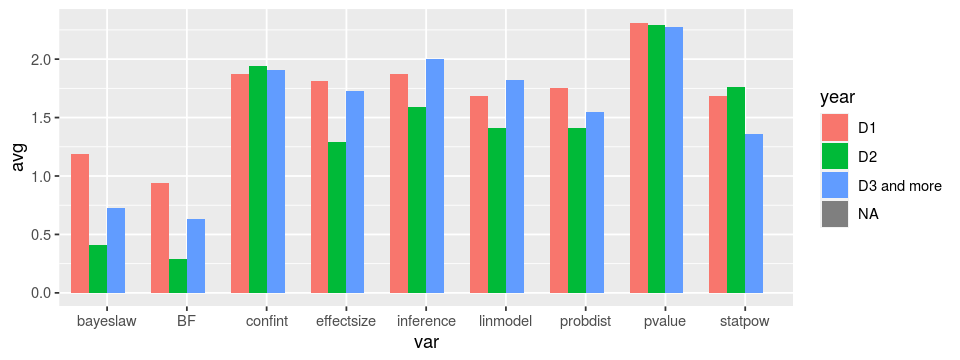

In [112]:
ggplot(data = df.plot, aes(x = var, y = avg, fill = year)) +
geom_bar(stat = "identity", position = position_dodge(.9))

Warning message:
“Removed 9 rows containing missing values (position_stack).”

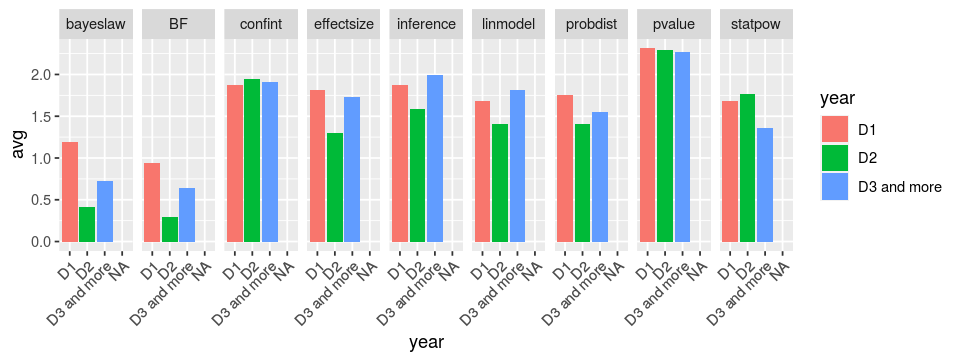

In [125]:
ggplot(data = df.plot, aes(x = year, y = avg, fill = year)) +
facet_grid(. ~ var, scales = "free_x") + 
geom_bar(stat = "identity") +
theme(axis.text.x = element_text(angle = 45, hjust = 1))

**Convert this notebook to R markdown**

In [ ]:
library(rmarkdown)
input = "1-01.ipynb"
rmarkdown:::convert_ipynb(input, output = xfun::with_ext(input, "Rmd"))